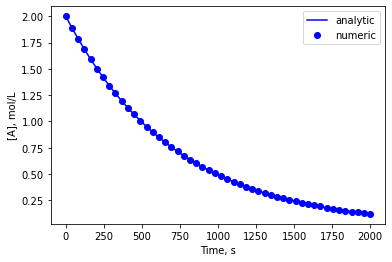

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.misc import derivative

# Reakcja: A -> B, k

# Podejście 1
# Rozwiązanie analityczne ("wzorem")

def analytic(t):
    return A0*np.exp(-k*t)


# Sposób 2
# Całkowanie numeryczne układu równań różniczkowych zwyczajnych (ODEs) - jedna zmienna niezależna

def model(y, t):
    A = y[0]             # y jest dwuelementowym wektorem
    B = y[1]
    dAdt = -k*A          # obliczenie pochodnych
    dBdt = k*A
    return [dAdt, dBdt]  # i ich zwrócenie

# Parametry (dowolne)
k = 1.4e-3               # 1/s <---- uwaga na jednostki miar
A0 = 2                   # mol/L  <----
B0 = 0

# zakres czasu
t = np.linspace(0, 2000) # 0 - 2000s

# warunki początkowe (!)
ic = [A0, B0]


# zależność stężenia od czasu
# analitycznie
Aa = analytic(t)

# numerycznie
results = odeint(model, ic, t)
An = results[:,0]

# Raportowanie i porównanie wyników
plt.plot(t, Aa, 'b-', label = 'anaitycznie')
plt.plot(t, An, 'bo', label = 'numerycznie')
plt.ylabel('[A], mol/L')
plt.xlabel('Time, s')
plt.legend()
